In [1]:
pip install yfinance panda ta

Note: you may need to restart the kernel to use updated packages.


In [67]:
nifty50_tickers=[
    "ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", "AXISBANK.NS",
    "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS", "BPCL.NS", "BHARTIARTL.NS",
    "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS",
    "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS",
    "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "ITC.NS",
    "INDUSINDBK.NS", "INFY.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
    "M&M.NS", "MARUTI.NS", "NTPC.NS", "NESTLEIND.NS", "ONGC.NS",
    "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS", "SBIN.NS", "SUNPHARMA.NS",
    "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS",
    "TITAN.NS", "UPL.NS", "ULTRACEMCO.NS", "WIPRO.NS"
]

In [69]:
import yfinance as yf
import pandas as pd
import os

def fetch_data_stock(ticker):
    print(f"[INFO] Fetching {ticker}...")
    data=yf.Ticker(ticker).history(start="2020-01-01",end="2024-12-31",interval="1d")
    if data.empty:
        print(f"[WARN] No data for {ticker}")
        return None
    data.dropna(inplace=True)
    data.index.name = "Date"
    return data
    
os.makedirs("data", exist_ok=True)
for f in os.listdir("data"):
    os.remove(os.path.join("data",f))

for ticker in nifty50_tickers:
    df=fetch_data_stock(ticker)
    if df is not None:
        filename = f"data/{ticker.replace('.NS', '')}.csv"
        df.to_csv(filename)
        print(f"[SAVED] {filename}")

[INFO] Fetching ADANIENT.NS...
[SAVED] data/ADANIENT.csv
[INFO] Fetching ADANIPORTS.NS...
[SAVED] data/ADANIPORTS.csv
[INFO] Fetching APOLLOHOSP.NS...
[SAVED] data/APOLLOHOSP.csv
[INFO] Fetching ASIANPAINT.NS...
[SAVED] data/ASIANPAINT.csv
[INFO] Fetching AXISBANK.NS...
[SAVED] data/AXISBANK.csv
[INFO] Fetching BAJAJ-AUTO.NS...
[SAVED] data/BAJAJ-AUTO.csv
[INFO] Fetching BAJFINANCE.NS...
[SAVED] data/BAJFINANCE.csv
[INFO] Fetching BAJAJFINSV.NS...
[SAVED] data/BAJAJFINSV.csv
[INFO] Fetching BPCL.NS...
[SAVED] data/BPCL.csv
[INFO] Fetching BHARTIARTL.NS...
[SAVED] data/BHARTIARTL.csv
[INFO] Fetching BRITANNIA.NS...
[SAVED] data/BRITANNIA.csv
[INFO] Fetching CIPLA.NS...
[SAVED] data/CIPLA.csv
[INFO] Fetching COALINDIA.NS...
[SAVED] data/COALINDIA.csv
[INFO] Fetching DIVISLAB.NS...
[SAVED] data/DIVISLAB.csv
[INFO] Fetching DRREDDY.NS...
[SAVED] data/DRREDDY.csv
[INFO] Fetching EICHERMOT.NS...
[SAVED] data/EICHERMOT.csv
[INFO] Fetching GRASIM.NS...
[SAVED] data/GRASIM.csv
[INFO] Fetching H

In [71]:
import ta

def add_indicators(df):
    try:
        df['RSI_14']=ta.momentum.RSIIndicator(close=df['Close'],window=14).rsi()

        macd=ta.trend.MACD(close=df['Close'])
        df['MACD_diff']=macd.macd_diff()

        df['EMA_20']=ta.trend.EMAIndicator(close=df['Close'],window=20).ema_indicator()
        df['EMA_50']=ta.trend.EMAIndicator(close=df['Close'],window=50).ema_indicator()

        df['Volume_SMA_5']=df['Volume'].rolling(window=5).mean()
        
        df.dropna(inplace=True)

        return df
    
    except Exception as e:
        print(f"[ERROR] Adding Indicators FAILED:{e}")
        return df

for ticker in nifty50_tickers:
    try:
        filename=f"data/{ticker.replace('.NS','')}.csv"
        
        if not os.path.exists(filename):
            print(f"[WARNING] STOCK FILE NOT FOUND:{filename}")
            continue

        df=pd.read_csv(filename,parse_dates=['Date'],index_col='Date')

        print(f"[INFO] Processing {ticker}...")

        df=add_indicators(df)
        df.to_csv(filename)

        print(f"[SUCCESS] Saved with Added Indicators: {filename}\n")

    except Exception as e:
        print(f"[ERROR] FAILED FOR {ticker}: {e}\n")


[INFO] Processing ADANIENT.NS...
[SUCCESS] Saved with Added Indicators: data/ADANIENT.csv

[INFO] Processing ADANIPORTS.NS...
[SUCCESS] Saved with Added Indicators: data/ADANIPORTS.csv

[INFO] Processing APOLLOHOSP.NS...
[SUCCESS] Saved with Added Indicators: data/APOLLOHOSP.csv

[INFO] Processing ASIANPAINT.NS...
[SUCCESS] Saved with Added Indicators: data/ASIANPAINT.csv

[INFO] Processing AXISBANK.NS...
[SUCCESS] Saved with Added Indicators: data/AXISBANK.csv

[INFO] Processing BAJAJ-AUTO.NS...
[SUCCESS] Saved with Added Indicators: data/BAJAJ-AUTO.csv

[INFO] Processing BAJFINANCE.NS...
[SUCCESS] Saved with Added Indicators: data/BAJFINANCE.csv

[INFO] Processing BAJAJFINSV.NS...
[SUCCESS] Saved with Added Indicators: data/BAJAJFINSV.csv

[INFO] Processing BPCL.NS...
[SUCCESS] Saved with Added Indicators: data/BPCL.csv

[INFO] Processing BHARTIARTL.NS...
[SUCCESS] Saved with Added Indicators: data/BHARTIARTL.csv

[INFO] Processing BRITANNIA.NS...
[SUCCESS] Saved with Added Indicator

In [73]:
def add_labels(df,durations=[66,188,345]):
    for d in durations:
        df[f'Future_Return_{d}']=df['Close'].shift(-d)/df['Close']-1
        df[f'Target_{d}']=df[f'Future_Return_{d}'].apply(lambda x:1 if x>0 else 0)
    
    df.dropna(inplace=True)
    return df


for filename in os.listdir("data"):
    if filename.endswith(".csv"):
        path=os.path.join("data",filename)
        df=pd.read_csv(path,index_col='Date',parse_dates=True)
        df=add_labels(df)
        df.to_csv(path)

In [ ]:
all_data=[]

data_dir="data"
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        ticker=filename.replace(".csv","")
        df=pd.read_csv(os.path.join(data_dir,filename),parse_dates=['Date'])
        df['Ticker']=ticker
        all_data.append(df)

combined_df=pd.concat(all_data,ignore_index=True)
combined_df.head()

In [75]:
def add_features(df):
    try:
        df['Return_1']=df['Close'].pct_change(1)
        df['Return_5']=df['Close'].pct_change(5)
        df['Volatility_5']=df['Close'].pct_change().rolling(window=5).std()

        df['Close_to_EMA20']=(df['Close']-df['EMA_20'])/df['EMA_20']
        df['Close_to_EMA50']=(df['Close']-df['EMA_50'])/df['EMA_50']

        df.dropna(inplace=True)
        return df

    except Exception as e:
        print(f"[ERROR] Feature engineering failed: {e}")
        return df

for ticker in nifty50_tickers:
    try:
        filename=f"data/{ticker.replace('.NS','')}.csv"
        
        if not os.path.exists(filename):
            print(f"[WARNING] STOCK FILE NOT FOUND:{filename}")
            continue

        df=pd.read_csv(filename,parse_dates=['Date'],index_col='Date')

        print(f"[INFO] Processing {ticker}...")

        df=add_features(df)
        df.to_csv(filename)

        print(f"[SUCCESS] Saved with New Added Indicators: {filename}\n")

    except Exception as e:
        print(f"[ERROR] FAILED FOR {ticker}: {e}\n")

[INFO] Processing ADANIENT.NS...
[SUCCESS] Saved with New Added Indicators: data/ADANIENT.csv

[INFO] Processing ADANIPORTS.NS...
[SUCCESS] Saved with New Added Indicators: data/ADANIPORTS.csv

[INFO] Processing APOLLOHOSP.NS...
[SUCCESS] Saved with New Added Indicators: data/APOLLOHOSP.csv

[INFO] Processing ASIANPAINT.NS...
[SUCCESS] Saved with New Added Indicators: data/ASIANPAINT.csv

[INFO] Processing AXISBANK.NS...
[SUCCESS] Saved with New Added Indicators: data/AXISBANK.csv

[INFO] Processing BAJAJ-AUTO.NS...
[SUCCESS] Saved with New Added Indicators: data/BAJAJ-AUTO.csv

[INFO] Processing BAJFINANCE.NS...
[SUCCESS] Saved with New Added Indicators: data/BAJFINANCE.csv

[INFO] Processing BAJAJFINSV.NS...
[SUCCESS] Saved with New Added Indicators: data/BAJAJFINSV.csv

[INFO] Processing BPCL.NS...
[SUCCESS] Saved with New Added Indicators: data/BPCL.csv

[INFO] Processing BHARTIARTL.NS...
[SUCCESS] Saved with New Added Indicators: data/BHARTIARTL.csv

[INFO] Processing BRITANNIA.NS

In [77]:
all_data=[]

data_dir="data"
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        ticker=filename.replace(".csv","")
        df=pd.read_csv(os.path.join(data_dir,filename),parse_dates=['Date'])
        df['Ticker']=ticker
        all_data.append(df)

combined_df=pd.concat(all_data,ignore_index=True)
combined_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_14,MACD_diff,...,Future_Return_188,Target_188,Future_Return_345,Target_345,Return_1,Return_5,Volatility_5,Close_to_EMA20,Close_to_EMA50,Ticker
0,2020-03-19 00:00:00+05:30,401.418994,435.348515,348.693299,428.697571,24017236,0.0,0.0,34.734499,-9.639140,...,0.152296,1,0.352224,1,0.045118,-0.043445,0.056354,-0.094645,-0.106814,BHARTIARTL
1,2020-03-20 00:00:00+05:30,428.938542,454.964021,420.889902,445.951477,19758966,0.0,0.0,40.942908,-7.508065,...,0.064872,1,0.349691,1,0.040247,-0.059368,0.051592,-0.052957,-0.068276,BHARTIARTL
2,2020-03-23 00:00:00+05:30,401.370778,429.613257,385.080742,392.647430,14907385,0.0,0.0,31.100155,-9.083286,...,0.232593,1,0.529592,1,-0.119529,-0.123602,0.070080,-0.152748,-0.173824,BHARTIARTL
3,2020-03-24 00:00:00+05:30,396.069308,422.046597,385.707318,389.466553,12947855,0.0,0.0,30.626988,-9.679520,...,0.259798,1,0.547798,1,-0.008101,-0.111392,0.070454,-0.146640,-0.174674,BHARTIARTL
4,2020-03-25 00:00:00+05:30,391.876323,422.432184,390.960639,413.612427,14093189,0.0,0.0,38.300803,-7.864898,...,0.209876,1,0.489950,1,0.061997,0.008342,0.073780,-0.085571,-0.119240,BHARTIARTL


In [81]:
features_to_keep=['RSI_14','MACD_diff','EMA_20','EMA_50','Volume_SMA_5','Close','Future_Return_66','Future_Return_188','Future_Return_345',
    'Target_66','Target_188','Target_345','Return_1','Return_5','Volatility_5','Close_to_EMA20','Close_to_EMA50']
combined_df=combined_df[features_to_keep].dropna()

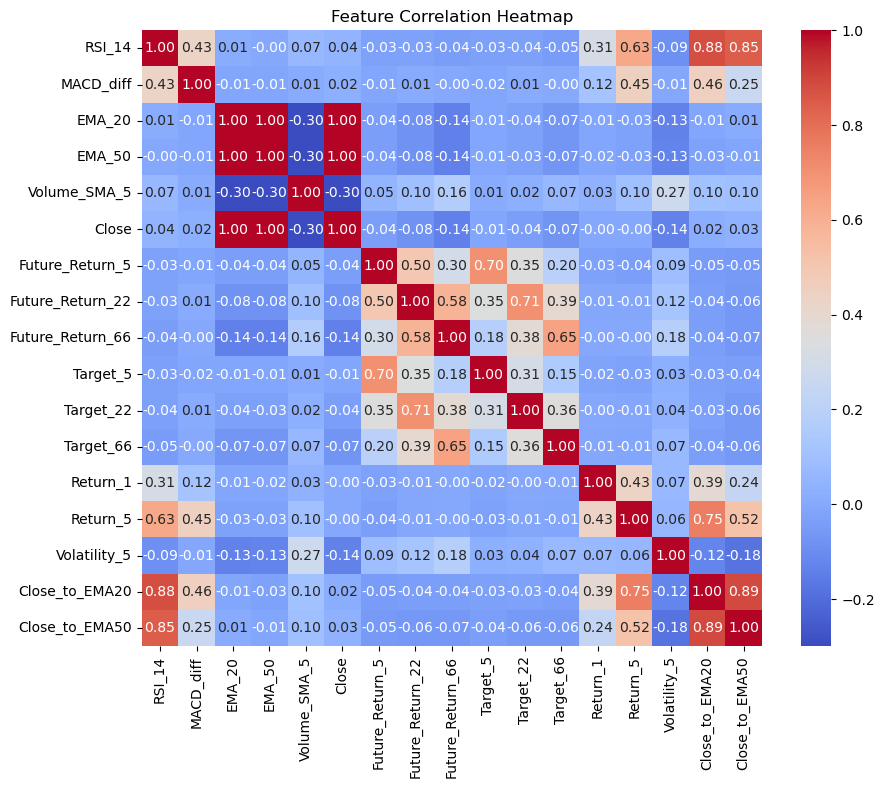

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=combined_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [83]:
combined_df=pd.DataFrame()

for filename in os.listdir("data"):
    if filename.endswith(".csv"):
        df=pd.read_csv(os.path.join("data",filename),parse_dates=["Date"])
        df["Ticker"]=filename.replace(".csv","")
        combined_df=pd.concat([combined_df, df],ignore_index=True)

combined_df.dropna(inplace=True)
combined_df.to_csv("combined_df_with_features.csv",index=False)

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


df=pd.read_csv("combined_df_with_features.csv") 
features=['RSI_14','MACD_diff','EMA_20', 'EMA_50','Volume_SMA_5','Close','Return_1','Return_5','Volatility_5',
          'Close_to_EMA20','Close_to_EMA50']

durations=[66,188,345]

for d in durations:
    print(f"\n TRAINING CLASSIFIER for Target_{d}:\n"+"-"*40)
    
    X=df[features]
    y=df[f'Target_{d}']
    
    data=pd.concat([X, y],axis=1).dropna()
    X_clean=data[features]
    y_clean=data[f'Target_{d}']
    
    X_train, X_test, y_train, y_test=train_test_split(X_clean,y_clean,test_size=0.2,random_state=42,stratify=y_clean)
    
    clf=RandomForestClassifier(n_estimators=100,random_state=42)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))

    model_path=f"models/classifier_{d}.pkl"
    joblib.dump(clf,model_path)
    print(f"[SAVED] MODEL:{model_path}")



 TRAINING CLASSIFIER for Target_66:
----------------------------------------
[[1755  831]
 [ 284 5343]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2586
           1       0.87      0.95      0.91      5627

    accuracy                           0.86      8213
   macro avg       0.86      0.81      0.83      8213
weighted avg       0.86      0.86      0.86      8213

[SAVED] MODEL:models/classifier_66.pkl

 TRAINING CLASSIFIER for Target_188:
----------------------------------------
[[1120  676]
 [ 145 6272]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1796
           1       0.90      0.98      0.94      6417

    accuracy                           0.90      8213
   macro avg       0.89      0.80      0.84      8213
weighted avg       0.90      0.90      0.89      8213

[SAVED] MODEL:models/classifier_188.pkl

 TRAINING CLASSIFIER for Target_345:
------------------

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score


durations=[66,188,345]

for d in durations:
    print(f"\n Training Regressor for {d}-Days Future Return")

    X=combined_df[features]
    y=combined_df[f'Future_Return_{d}']

    reg_data=pd.concat([X,y],axis=1).dropna()
    X_clean=reg_data[features]
    y_clean=reg_data[f'Future_Return_{d}']

    X_train,X_test,y_train,y_test=train_test_split(X_clean,y_clean,test_size=0.2,random_state=42)

    rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
    rf_reg.fit(X_train,y_train)

    y_pred=rf_reg.predict(X_test)

    print(f" RMSE:{root_mean_squared_error(y_test, y_pred):.4f}")
    print(f" R² Score:{r2_score(y_test, y_pred):.4f}")

    model_path=f"models/regressor_{d}.pkl"
    joblib.dump(rf_reg,model_path)
    print(f"[SAVED] MODEL:{model_path}")


 Training Regressor for 66-Days Future Return
 RMSE:0.1000
 R² Score:0.6973
[SAVED] MODEL:models/regressor_66.pkl

 Training Regressor for 188-Days Future Return
 RMSE:0.2187
 R² Score:0.7739
[SAVED] MODEL:models/regressor_188.pkl

 Training Regressor for 345-Days Future Return
 RMSE:0.3388
 R² Score:0.7962
[SAVED] MODEL:models/regressor_345.pkl
